In [2]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('/content/dataset (1).csv')

In [4]:
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


In [5]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [6]:
# Correct a column name that has a typo and replace single quotes with underscores
df.rename(columns = {"Nacionality": "Nationality",
                           "Mother's qualification": "Mother_qualification",
                           "Father's qualification": "Father_qualification",
                           "Mother's occupation": "Mother_occupation",
                           "Father's occupation": "Father_occupation",
                           "Age at enrollment": "Age"}, inplace = True)

# Replace white space in the column names with underscore
df.columns = df.columns.str.replace(' ', '_')


In [7]:
# Change data types of columns that should be categorical
col = ['Marital_status', 'Application_mode', 'Application_order', 'Course',
      'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
      'International', 'Target']

df[col] = df[col].astype('category')

Text(0.5, 1.0, 'Proportion of the Labels')

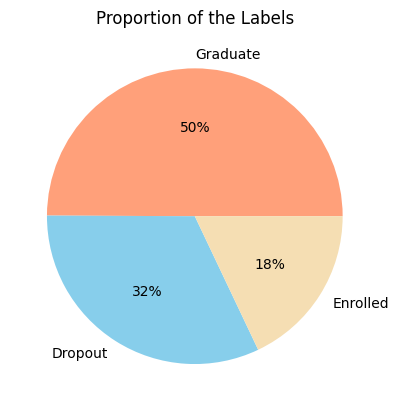

In [8]:
labels = df['Target'].value_counts().index
values = df['Target'].value_counts().values

plt.pie(values, labels = labels, colors = ['lightsalmon', 'skyblue', 'wheat'],
        autopct = '%1.0f%%')
plt.title('Proportion of the Labels')

In [9]:
from sklearn.preprocessing import OrdinalEncoder # Import OrdinalEncoder
df['Target_encoded'] = OrdinalEncoder(categories = [['Dropout', 'Enrolled', 'Graduate']]).fit_transform(df[['Target']])

# Drop 'Target' variable
df.drop('Target', axis = 1, inplace = True)

In [10]:
cats = ['Marital_status', 'Application_mode', 'Application_order',
        'Course','Daytime/evening_attendance', 'Previous_qualification',
        'Nationality','Mother_qualification', 'Father_qualification',
        'Mother_occupation', 'Father_occupation', 'Displaced',
        'Educational_special_needs', 'Debtor','Tuition_fees_up_to_date',
        'Gender', 'Scholarship_holder','International']

# Get the p-values from Chi-Square indenpendence tests
p_value = []

In [11]:
from scipy.stats import chi2_contingency # Import the missing function


In [12]:
for col in cats:
    crosstable = pd.crosstab(index = df[col],
                             columns = df['Target_encoded'])
    p = chi2_contingency(crosstable)[1]
    p_value.append(p)

chi2_result = pd.DataFrame({
    'Variable': cats,
    'P_value': [round(ele, 5) for ele in p_value]
})

chi2_result = chi2_result.sort_values('P_value')

chi2_result

,Variable,P_value
0,Marital_status,0.00000
15,Gender,0.00000
14,Tuition_fees_up_to_date,0.00000
13,Debtor,0.00000
11,Displaced,0.00000
10,Father_occupation,0.00000
9,Mother_occupation,0.00000
16,Scholarship_holder,0.00000
8,Father_qualification,0.00000
5,Previous_qualification,0.00000


In [13]:
selected = df.drop(['Nationality', 'International', 'Educational_special_needs'],
                              axis = 1)

In [14]:
print(selected.columns)

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance', 'Previous_qualification',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Debtor', 'Tuition_fees_up_to_date',
       'Gender', 'Scholarship_holder', 'Age',
       'Curricular_units_1st_sem_(credited)',
       'Curricular_units_1st_sem_(enrolled)',
       'Curricular_units_1st_sem_(evaluations)',
       'Curricular_units_1st_sem_(approved)',
       'Curricular_units_1st_sem_(grade)',
       'Curricular_units_1st_sem_(without_evaluations)',
       'Curricular_units_2nd_sem_(credited)',
       'Curricular_units_2nd_sem_(enrolled)',
       'Curricular_units_2nd_sem_(evaluations)',
       'Curricular_units_2nd_sem_(approved)',
       'Curricular_units_2nd_sem_(grade)',
       'Curricular_units_2nd_sem_(without_evaluations)', 'Unemployment_rate',
       'Inflation_rate', 'GDP', 'Target_encoded'],
      dtype='ob

In [15]:
# List of all column pairs to average
columns_to_average = [
    ('Curricular_units_1st_sem_(credited)', 'Curricular_units_2nd_sem_(credited)'),
    ('Curricular_units_1st_sem_(enrolled)', 'Curricular_units_2nd_sem_(enrolled)'),
    ('Curricular_units_1st_sem_(evaluations)', 'Curricular_units_2nd_sem_(evaluations)'),
    ('Curricular_units_1st_sem_(approved)', 'Curricular_units_2nd_sem_(approved)'),
    ('Curricular_units_1st_sem_(grade)', 'Curricular_units_2nd_sem_(grade)'),
    ('Curricular_units_1st_sem_(without_evaluations)', 'Curricular_units_2nd_sem_(without_evaluations)')
]

# Loop through the pairs and calculate the average
for col1, col2 in columns_to_average:
    # Clean up the column name by removing parentheses and spaces
    col1_clean = col1.split('(')[0].strip()
    col2_clean = col2.split('(')[0].strip()

    new_column_name = f'avg_{col1_clean}_{col2_clean}'

    # Create the new column with the average
    selected[new_column_name] = selected[[col1, col2]].mean(axis=1)

# Print out the columns to verify they were created correctly
print(selected.columns)


Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance', 'Previous_qualification',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Debtor', 'Tuition_fees_up_to_date',
       'Gender', 'Scholarship_holder', 'Age',
       'Curricular_units_1st_sem_(credited)',
       'Curricular_units_1st_sem_(enrolled)',
       'Curricular_units_1st_sem_(evaluations)',
       'Curricular_units_1st_sem_(approved)',
       'Curricular_units_1st_sem_(grade)',
       'Curricular_units_1st_sem_(without_evaluations)',
       'Curricular_units_2nd_sem_(credited)',
       'Curricular_units_2nd_sem_(enrolled)',
       'Curricular_units_2nd_sem_(evaluations)',
       'Curricular_units_2nd_sem_(approved)',
       'Curricular_units_2nd_sem_(grade)',
       'Curricular_units_2nd_sem_(without_evaluations)', 'Unemployment_rate',
       'Inflation_rate', 'GDP', 'Target_encoded',
       'avg_Curr

In [16]:
selected['avg_credited'] = selected[['Curricular_units_1st_sem_(credited)',
                                      'Curricular_units_2nd_sem_(credited)']].mean(axis = 1)
selected['avg_enrolled'] = selected[['Curricular_units_1st_sem_(enrolled)',
                                      'Curricular_units_2nd_sem_(enrolled)']].mean(axis = 1)
selected['avg_evaluations'] = selected[['Curricular_units_1st_sem_(evaluations)',
                                        'Curricular_units_2nd_sem_(evaluations)']].mean(axis = 1)
selected['avg_approved'] = selected[['Curricular_units_1st_sem_(approved)',
                                     'Curricular_units_2nd_sem_(approved)']].mean(axis = 1)
selected['avg_grade'] = selected[['Curricular_units_1st_sem_(grade)',
                                  'Curricular_units_2nd_sem_(grade)']].mean(axis = 1)
selected['avg_without_evaluations'] = selected[['Curricular_units_1st_sem_(without_evaluations)',
                                                 'Curricular_units_2nd_sem_(without_evaluations)']].mean(axis = 1)


In [17]:
num_features = selected[['Age', 'avg_credited', 'avg_enrolled',
                              'avg_evaluations', 'avg_approved',
                              'avg_grade', 'avg_without_evaluations',
                              'Unemployment_rate', 'Inflation_rate',
                              'GDP', 'Target_encoded']]

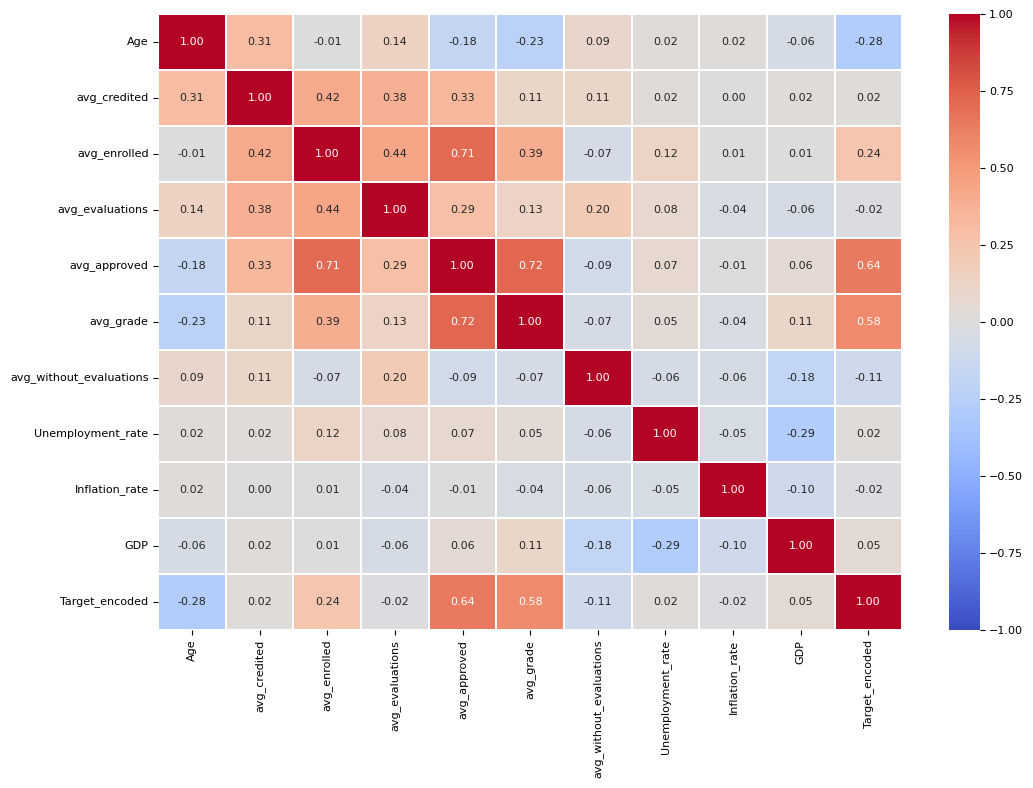

In [18]:
plt.figure(figsize = (12, 8))
plt.rcParams.update({'font.size': 8})
hm = sns.heatmap(num_features.corr(method = 'spearman'),
                 cmap = 'coolwarm', annot = True, fmt = '.2f',
                 linewidths = .2, vmin = -1, vmax = 1, center = 0)

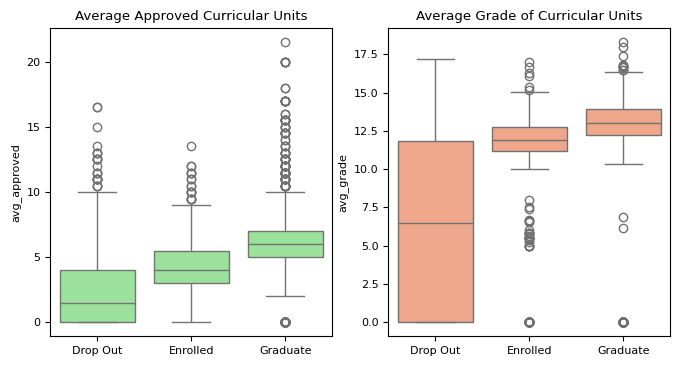

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
sns.boxplot(data =selected, x = 'Target_encoded', y = 'avg_approved',
            color = 'lightgreen', ax = ax1)
ax1.set_title('Average Approved Curricular Units')
ax1.set_xlabel("")
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['Drop Out', 'Enrolled', 'Graduate']);

sns.boxplot(data = selected, x = 'Target_encoded', y = 'avg_grade',
            color = 'lightsalmon', ax = ax2)
ax2.set_title('Average Grade of Curricular Units')
ax2.set_xlabel("")
ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(['Drop Out', 'Enrolled', 'Graduate']);

In [20]:
selected.loc[(selected['avg_approved'] == 0) & (selected['Target_encoded'] == 2)]

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Inflation_rate,GDP,Target_encoded,avg_Curricular_units_1st_sem__Curricular_units_2nd_sem_,avg_credited,avg_enrolled,avg_evaluations,avg_approved,avg_grade,avg_without_evaluations
20,1,1,3,2,1,1,1,1,10,9,...,0.6,2.02,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,1,1,3,2,1,1,13,14,6,4,...,1.4,1.74,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,1,1,4,2,1,1,1,1,10,11,...,0.3,-0.92,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
405,1,1,1,2,1,1,1,14,4,10,...,3.7,-1.70,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527,1,12,1,2,1,1,3,1,3,11,...,-0.8,-3.12,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,1,8,2,2,1,1,3,1,3,7,...,2.8,-4.06,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4291,1,1,1,2,1,1,1,28,5,6,...,2.8,-4.06,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4353,1,1,1,2,1,1,3,1,5,5,...,0.5,1.79,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4365,1,1,2,2,1,1,23,28,5,10,...,2.6,0.32,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
selected = selected.drop(selected.loc[(selected['avg_approved'] == 0) & (selected['Target_encoded'] == 2)].index)

# Check the rows with zero average grade and students being graduade
selected.loc[(selected['avg_grade'] == 0) & (selected['Target_encoded'] == 2)]

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Inflation_rate,GDP,Target_encoded,avg_Curricular_units_1st_sem__Curricular_units_2nd_sem_,avg_credited,avg_enrolled,avg_evaluations,avg_approved,avg_grade,avg_without_evaluations


In [22]:
# Before dropping columns, check if they exist in the DataFrame:
columns_to_drop = ['Unemployment_rate', 'Inflation_rate',
                  'avg_credited', 'avg_evaluations',
                  'Curricular_units_1st_sem_credited',
                  'Curricular_units_1st_sem_enrolled',
                  'Curricular_units_1st_sem_evaluations',
                  'Curricular_units_1st_sem_approved',
                  'Curricular_units_1st_sem_grade',
                  'Curricular_units_1st_sem_without_evaluations',
                  'Curricular_units_2nd_sem_credited',
                  'Curricular_units_2nd_sem_enrolled',
                  'Curricular_units_2nd_sem_evaluations',
                  'Curricular_units_2nd_sem_approved',
                  'Curricular_units_2nd_sem_grade',
                  'Curricular_units_2nd_sem_without_evaluations']

# Filter out columns that are not in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in selected.columns]

# Now drop only the existing columns
selected = selected.drop(columns=existing_columns_to_drop)

In [23]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(selected, test_size = 0.2,
                               stratify = selected['Target_encoded'], random_state = 0)


In [24]:
train_features = train.drop('Target_encoded', axis = 1)
train_labels = train['Target_encoded']
test_features = test.drop('Target_encoded', axis = 1)
test_labels = test['Target_encoded']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score # Import necessary metrics
rf_base = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
rf_base.fit(train_features, train_labels)

y_pred = rf_base.predict(test_features)
y_prob = rf_base.predict_proba(test_features)

rf_base_accuracy = round(balanced_accuracy_score(test_labels, y_pred), 3)
rf_base_f1score = round(f1_score(test_labels, y_pred, average = 'macro'), 3)
rf_base_auc = round(roc_auc_score(test_labels, y_prob, average = 'macro', multi_class = 'ovr'), 3)

print('Random Forest Baseline Performance:')
print('Balanced Accuracy:', rf_base_accuracy)
print('F1 Score:', rf_base_f1score)
print('AUC score:', rf_base_auc)

Random Forest Baseline Performance:
Balanced Accuracy: 0.7
F1 Score: 0.711
AUC score: 0.907


In [26]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV # Import RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score # Import necessary metrics
parm = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 5],
    'max_samples': [0.5, 0.75, 1]
}

# Tune the hyperparameters of the Random Forest
rsv_rf = RandomizedSearchCV(estimator = RandomForestClassifier(class_weight = 'balanced',
                                                               random_state = 42),
                            param_distributions = parm, scoring = 'balanced_accuracy',
                            n_iter = 30, n_jobs = -1,  random_state = 0)

rsv_rf.fit(train_features, train_labels)
tuned_rf = rsv_rf.best_estimator_

# Check the model performance
y_pred = tuned_rf.predict(test_features)
y_prob = tuned_rf.predict_proba(test_features)

tuned_rf_accuracy = round(balanced_accuracy_score(test_labels, y_pred), 3)
tuned_rf_f1score = round(f1_score(test_labels, y_pred, average = 'macro'), 3)
tuned_rf_auc = round(roc_auc_score(test_labels, y_prob, average = 'macro', multi_class = 'ovr'), 3)
print('Tuned Random Forest Performance:')
print('Balanced Accuracy:', tuned_rf_accuracy)
print('F1 Score:', tuned_rf_f1score)
print('AUC score:', tuned_rf_auc)

Tuned Random Forest Performance:
Balanced Accuracy: 0.734
F1 Score: 0.737
AUC score: 0.906


In [27]:
!pip install xgboost
from xgboost import XGBClassifier # Import the XGBClassifier class
from sklearn.utils.class_weight import compute_sample_weight # Import the missing function
sample_weights = compute_sample_weight(class_weight='balanced', y = train_labels)
xgb_base = XGBClassifier(enable_categorical = True, objective = 'multi:softmax',
                         num_class = 3, random_state = 42)
xgb_base.fit(train_features, train_labels, sample_weight=sample_weights)

y_pred = xgb_base.predict(test_features)
y_prob = xgb_base.predict_proba(test_features)

xgb_base_accuracy = round(balanced_accuracy_score(test_labels, y_pred), 3)
xgb_base_f1score = round(f1_score(test_labels, y_pred, average = 'macro'), 3)
xgb_base_auc = round(roc_auc_score(test_labels, y_prob, average = 'macro', multi_class = 'ovr'), 3)

print('XGBoost baseline performance:')
print('Balanced accuracy:', xgb_base_accuracy)
print('F1 score:', xgb_base_f1score)
print('AUC score:', xgb_base_auc)

XGBoost baseline performance:
Balanced accuracy: 0.756
F1 score: 0.764
AUC score: 0.9


In [28]:
!pip install -U scikit-learn xgboost

In [29]:
import pandas as pd
performance = pd.DataFrame({
            'Model': ['rf_base', 'tuned_rf', 'xgb_base'],
            'Balanced Accuracy': [rf_base_accuracy, tuned_rf_accuracy, xgb_base_accuracy ],
            'F1 Score': [rf_base_f1score, tuned_rf_f1score, xgb_base_f1score],

            'AUC': [rf_base_auc, tuned_rf_auc, xgb_base_auc]
            })

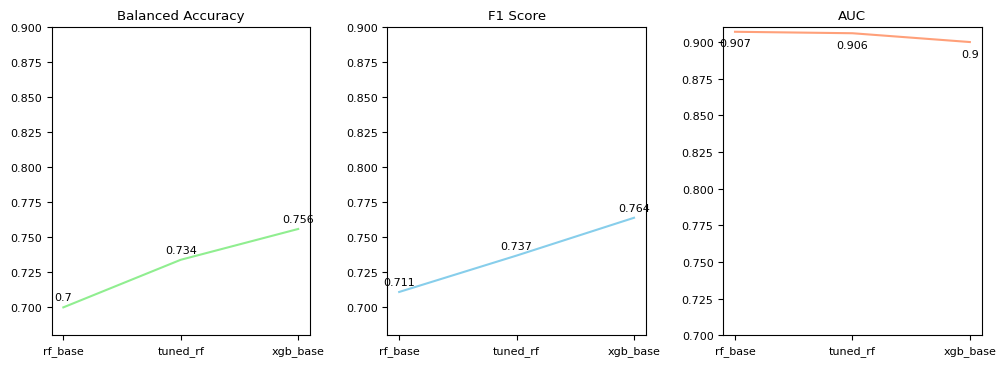

In [30]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4))
plt.subplots_adjust(wspace = 0.3)

# Extract x-ticks and model names
x_ticks = range(len(performance['Model']))
models = performance['Model'].to_list()

# Plot Balanced Accuracy
axs[0].plot(x_ticks, performance['Balanced Accuracy'], linestyle = '-', color = 'lightgreen')
axs[0].set_title('Balanced Accuracy')
axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(models)
axs[0].set_ylim(0.68, 0.9)
y1 = performance['Balanced Accuracy'].to_list()
for i, y in enumerate(y1):
    axs[0].text(i, y+0.005, f'{y}', ha = 'center')

# Plot F1 Score
axs[1].plot(x_ticks, performance['F1 Score'], linestyle = '-', color = 'skyblue')
axs[1].set_title('F1 Score')
axs[1].set_xticks(x_ticks)
axs[1].set_xticklabels(models)
axs[1].set_ylim(0.68,0.9)
y2 = performance['F1 Score'].to_list()
for i, y in enumerate(y2):
    axs[1].text(i, y+0.005, f'{y}', ha = 'center')

# Plot AUC Score
axs[2].plot(x_ticks, performance['AUC'], linestyle = '-', color = 'lightsalmon')
axs[2].set_title('AUC')
axs[2].set_xticks(x_ticks)
axs[2].set_xticklabels(models)
axs[2].set_ylim(0.70, 0.91)
y3 = performance['AUC'].to_list()
for i, y in enumerate(y3):
    axs[2].text(i, y-0.01, f'{y}', ha = 'center')



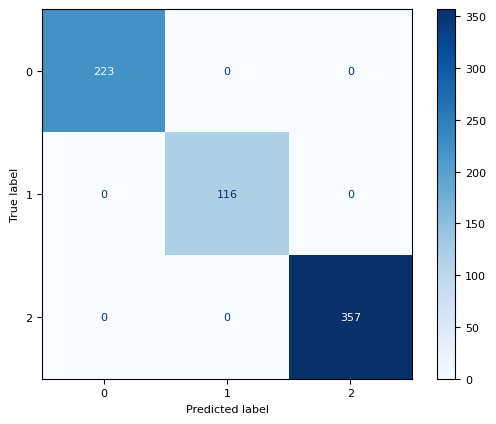

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, xgb_base.predict(X_test), labels=xgb_base.classes_)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_base.classes_)
disp.plot(cmap='Blues')
plt.show()


In [36]:
train_bi = train.drop(train[train['Target_encoded']==1].index)
test_bi = test.drop(test[test['Target_encoded']==1].index)

# Set the target label as 1 - 'Dropout', 0 - 'Graduate'
train_bi['Target_encoded'] = train_bi['Target_encoded'].replace([0, 2], [1, 0])
test_bi['Target_encoded'] = test_bi['Target_encoded'].replace([0, 2], [1, 0])

# Extract features and labels
train_bi_X = train_bi.drop('Target_encoded', axis = 1)
train_bi_y = train_bi['Target_encoded']
test_bi_X = test_bi.drop('Target_encoded', axis = 1)
test_bi_y = test_bi['Target_encoded']

In [37]:
rf_bi = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
rf_bi.fit(train_bi_X, train_bi_y)

y_pred = rf_bi.predict(test_bi_X)
y_prob = rf_bi.predict_proba(test_bi_X)

rf_bi_accuracy = round(balanced_accuracy_score(test_bi_y, y_pred), 3)
rf_bi_f1score = round(f1_score(test_bi_y, y_pred), 3)
rf_bi_auc = round(roc_auc_score(test_bi_y, y_prob[:, 1]), 3)

print('Random Forest Baseline Performance:')
print('Balanced Accuracy:', rf_bi_accuracy)
print('F1 Score:', rf_bi_f1score)
print('AUC score:', rf_bi_auc)

Random Forest Baseline Performance:
Balanced Accuracy: 0.921
F1 Score: 0.912
AUC score: 0.964


In [38]:
neg_num = sum(train_bi_y == 0)
pos_num = sum(train_bi_y == 1)
weight = neg_num / pos_num

xgb_bi = XGBClassifier(enable_categorical = True, scale_pos_weight = weight,
                       importance_type = 'gain', random_state = 42)
xgb_bi.fit(train_bi_X, train_bi_y)

y_pred = xgb_bi.predict(test_bi_X)
y_prob = xgb_bi.predict_proba(test_bi_X)

xgb_bi_accuracy = round(balanced_accuracy_score(test_bi_y, y_pred), 3)
xgb_bi_f1score = round(f1_score(test_bi_y, y_pred), 3)
xgb_bi_auc = round(roc_auc_score(test_bi_y, y_prob[:, 1]), 3)

print('xgb_bi performance:')
print('Balanced accuracy:', xgb_bi_accuracy)
print('F1 score:', xgb_bi_f1score)
print('AUC score:', xgb_bi_auc)

xgb_bi performance:
Balanced accuracy: 0.925
F1 score: 0.915
AUC score: 0.957


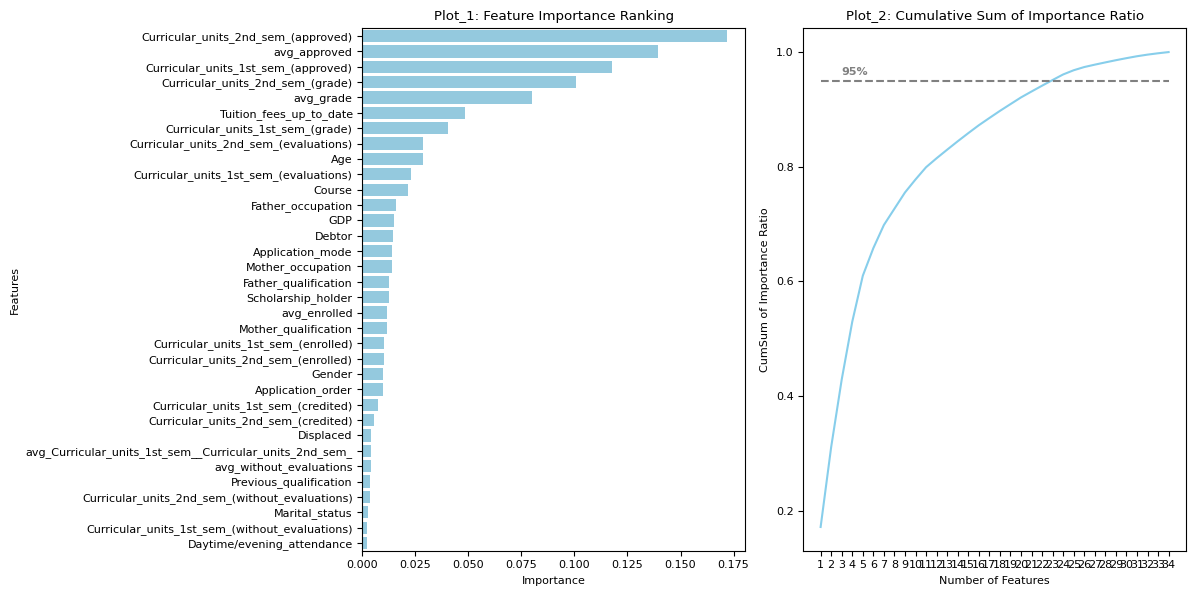

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace this with your actual model's feature importances
# Assuming you have a trained model like rf_bi, xgb_bi, etc.
feature_importances = rf_bi.feature_importances_  # Or replace with the appropriate model's feature_importances_
feature_names = train_bi_X.columns  # If using pandas DataFrame, get the column names

# Create the feature importance DataFrame
feature_imp = pd.DataFrame({
    'Features': feature_names,
    'Importance': feature_importances
})

# Sort by importance
feature_imp = feature_imp.sort_values(by='Importance', ascending=False)

# Calculate cumulative sum ratio
feature_imp['cum_ratio'] = feature_imp['Importance'].cumsum() / feature_imp['Importance'].sum()

# Plotting
n = len(feature_imp)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot 1: Feature Importance Barplot
sns.barplot(data=feature_imp, x='Importance', y='Features', color='skyblue', ax=ax1)
ax1.set_title('Plot_1: Feature Importance Ranking')

# Plot 2: Cumulative Sum of Importance Ratio
ax2.plot(range(1, n + 1), feature_imp['cum_ratio'], color='skyblue')
ax2.plot(range(1, n + 1), np.repeat(0.95, n), color='grey', linestyle='dashed')
ax2.text(3, 0.96, '95%', color='grey', fontweight='bold')
ax2.set_title('Plot_2: Cumulative Sum of Importance Ratio')
ax2.set_xlabel('Number of Features')
ax2.set_ylabel('CumSum of Importance Ratio')
ax2.set_xticks(range(1, len(feature_imp) + 1), range(1, len(feature_imp) + 1))

plt.tight_layout()
plt.show()


In [85]:
least_imp = feature_imp['Features'][-5:].to_list()
train_16X = train_bi_X.drop(columns = least_imp)
test_16X = test_bi_X.drop(columns = least_imp)

In [123]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report

# Assuming rf_b16 is already trained on train_16X and train_bi_y

# Make predictions on the test set
y_pred = rf_b16.predict(test_16X)
y_prob = rf_b16.predict_proba(test_16X)

# Calculate the performance metrics
rf_b16_accuracy = round(balanced_accuracy_score(test_bi_y, y_pred), 3)
rf_b16_f1score = round(f1_score(test_bi_y, y_pred), 3)
rf_b16_auc = round(roc_auc_score(test_bi_y, y_prob[:, 1]), 3)
rf_b16_precision = round(precision_score(test_bi_y, y_pred), 3)
rf_b16_recall = round(recall_score(test_bi_y, y_pred), 3)
rf_b16_confusion_matrix = confusion_matrix(test_bi_y, y_pred)

# Print the performance metrics
print('rf_b16 Performance:')
print('Balanced Accuracy:', rf_b16_accuracy)
print('F1 Score:', rf_b16_f1score)
print('AUC score:', rf_b16_auc)
print('Precision:', rf_b16_precision)
print('Recall:', rf_b16_recall)
print('Confusion Matrix:\n', rf_b16_confusion_matrix)

# Print the classification report
print('\nClassification Report:\n', classification_report(test_bi_y, y_pred))


rf_b16 Performance:
Balanced Accuracy: 0.92
F1 Score: 0.91
AUC score: 0.959
Precision: 0.968
Recall: 0.859
Confusion Matrix:
 [[419   8]
 [ 40 244]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.95       427
         1.0       0.97      0.86      0.91       284

    accuracy                           0.93       711
   macro avg       0.94      0.92      0.93       711
weighted avg       0.93      0.93      0.93       711



In [121]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report

# Assuming xgb_b16 is already trained on train_16X and train_bi_y

# Make predictions on the test set
y_pred = xgb_b16.predict(test_16X)
y_prob = xgb_b16.predict_proba(test_16X)

# Calculate the performance metrics
xgb_b16_accuracy = round(balanced_accuracy_score(test_bi_y, y_pred), 3)
xgb_b16_f1score = round(f1_score(test_bi_y, y_pred), 3)
xgb_b16_auc = round(roc_auc_score(test_bi_y, y_prob[:, 1]), 3)
xgb_b16_precision = round(precision_score(test_bi_y, y_pred), 3)
xgb_b16_recall = round(recall_score(test_bi_y, y_pred), 3)
xgb_b16_confusion_matrix = confusion_matrix(test_bi_y, y_pred)

# Print the performance metrics
print('xgb_b16 performance:')
print('Balanced accuracy:', xgb_b16_accuracy)
print('F1 score:', xgb_b16_f1score)
print('AUC score:', xgb_b16_auc)
print('Precision:', xgb_b16_precision)
print('Recall:', xgb_b16_recall)
print('Confusion Matrix:\n', xgb_b16_confusion_matrix)

# Print the classification report
print('\nClassification Report:\n', classification_report(test_bi_y, y_pred))


xgb_b16 performance:
Balanced accuracy: 0.922
F1 score: 0.911
AUC score: 0.961
Precision: 0.957
Recall: 0.87
Confusion Matrix:
 [[416  11]
 [ 37 247]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95       427
         1.0       0.96      0.87      0.91       284

    accuracy                           0.93       711
   macro avg       0.94      0.92      0.93       711
weighted avg       0.93      0.93      0.93       711



In [101]:
xgb_b16 = XGBClassifier(enable_categorical = True, scale_pos_weight = 1.65,
                        importance_type = 'gain', random_state = 48)
xgb_b16.fit(train_16X, train_bi_y)

y_pred = xgb_b16.predict(test_16X)
y_prob = xgb_b16.predict_proba(test_16X)

xgb_b16_accuracy = round(balanced_accuracy_score(test_bi_y, y_pred), 3)
xgb_b16_f1score = round(f1_score(test_bi_y, y_pred), 3)
xgb_b16_auc = round(roc_auc_score(test_bi_y, y_prob[:, 1]), 3)

print('xgb_b16 performance:')
print('Balanced accuracy:', xgb_b16_accuracy)
print('F1 score:', xgb_b16_f1score)
print('AUC score:', xgb_b16_auc)

xgb_b16 performance:
Balanced accuracy: 0.922
F1 score: 0.911
AUC score: 0.961


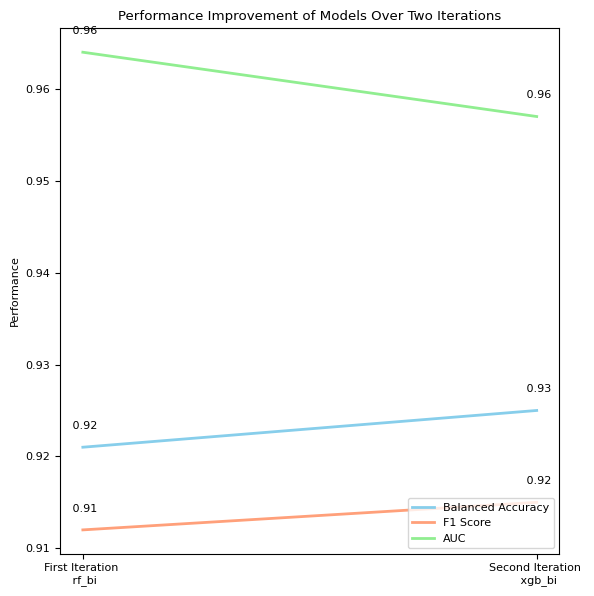

In [102]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assume the performance metrics for rf_bi and xgb_bi are already calculated
# Example: rf_bi_accuracy, xgb_bi_accuracy, etc.
results = pd.DataFrame({
    'Models': ['rf_bi', 'xgb_bi', 'rf_bi', 'xgb_bi', 'rf_bi', 'xgb_bi'],
    'Metrics': ['Balanced Accuracy', 'Balanced Accuracy', 'F1 Score', 'F1 Score', 'AUC', 'AUC'],
    'Performance': [rf_bi_accuracy, xgb_bi_accuracy, rf_bi_f1score,
                    xgb_bi_f1score, rf_bi_auc, xgb_bi_auc]
})

# Ensure the lengths match
assert len(results['Models']) == len(results['Metrics']) == len(results['Performance']), "Column lengths do not match"

# Plotting performance improvement over iterations
plt.figure(figsize=(6, 6))
xticks = range(len(results['Models'].unique()))

# Create custom labels for the iterations
mods = ['First Iteration \n rf_bi', 'Second Iteration \n xgb_bi']

# Plot the results
ax = sns.lineplot(data=results, x='Models', y='Performance', hue='Metrics',
                  palette=['skyblue', 'lightsalmon', 'lightgreen'], linewidth=2)

ax.set_xticks(xticks)
ax.set_xticklabels(mods)
ax.set_xlabel('')

# Add text annotations for performance values
for x, y in zip([0, 1] * 3, results['Performance']):
    ax.text(x, y + 0.002, f'{y: .2f}', ha='center')

# Set title and legend
ax.set_title('Performance Improvement of Models Over Two Iterations')
ax.legend(title='', loc='lower right')

plt.tight_layout()
plt.show()


In [119]:
# Assuming `train_16X` and `test_16X` are already filtered to include only important features
important_features = train_16X.columns.tolist()  # This will give the list of features after dropping least important ones

def user_input_prediction(model):
    # Collect user inputs only for the important features
    user_data = {}
    for feature in important_features:
        user_data[feature] = float(input(f"Enter value for {feature}: "))

    # Convert user input into DataFrame
    user_df = pd.DataFrame([user_data])

    # Make prediction using the provided model (either rf_b16 or xgb_b16)
    prediction = model.predict(user_df)  # Use the model to predict based on user input
    print(f"Prediction: {prediction}")

# Train the Random Forest model (rf_b16) and XGBoost model (xgb_b16)
rf_b16.fit(train_16X, train_bi_y)  # Fit the model on the training data
xgb_b16.fit(train_16X, train_bi_y)  # Fit the model on the training data

# Call the function to get user input and make the prediction for rf_b16 or xgb_b16
model_choice = input("Enter the model you want to use (rf_b16 / xgb_b16): ").strip()

# Select the model based on user input
if model_choice == 'rf_b16':
    user_input_prediction(rf_b16)  # For Random Forest model
elif model_choice == 'xgb_b16':
    user_input_prediction(xgb_b16)  # For XGBoost model
else:
    print("Invalid model choice. Please enter 'rf_b16' or 'xgb_b16'.")


Enter the model you want to use (rf_b16 / xgb_b16): rf_b16
Enter value for Application_mode: 0
Enter value for Application_order: 1
Enter value for Course: 4
Enter value for Mother_qualification: 0
Enter value for Father_qualification: 1
Enter value for Mother_occupation: 0
Enter value for Father_occupation: 1
Enter value for Displaced: 4
Enter value for Debtor: 6
Enter value for Tuition_fees_up_to_date: 78
Enter value for Gender: 4
Enter value for Scholarship_holder: 56
Enter value for Age: 68
Enter value for Curricular_units_1st_sem_(credited): 6
Enter value for Curricular_units_1st_sem_(enrolled): 5
Enter value for Curricular_units_1st_sem_(evaluations): 4
Enter value for Curricular_units_1st_sem_(approved): 2
Enter value for Curricular_units_1st_sem_(grade): 4
Enter value for Curricular_units_2nd_sem_(credited): 7
Enter value for Curricular_units_2nd_sem_(enrolled): 9
Enter value for Curricular_units_2nd_sem_(evaluations): 4
Enter value for Curricular_units_2nd_sem_(approved): 34
E